Universidad del Valle de Guatemala <br>
Facultad de Ingeniería <br>
Departamento de Ciencias de la computación <br>
Data Science

# Laboratorio 9

Integrantes
- Gabriel Vicente
- Christopher García
- Isabel Solano


## Análisis Exploratorio

In [1]:
# cargar el csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datos = pd.read_csv("Food Share Emissions.csv")

In [2]:
datos.head()

,Entity,Code,Year,Food's share of total emissions (incl. LULUFC)
0,Afghanistan,AFG,1990,78.558522
1,Afghanistan,AFG,1991,79.335651
2,Afghanistan,AFG,1992,84.268804
3,Afghanistan,AFG,1993,85.247941
4,Afghanistan,AFG,1994,86.897834


In [3]:
datos.describe()

,Year,Food's share of total emissions (incl. LULUFC)
count,5772.00000,5772.000000
mean,2002.50000,119.224213
std,7.50065,4192.918610
min,1990.00000,-19724.573980
25%,1996.00000,22.204820
50%,2002.50000,46.586162
75%,2009.00000,85.203112
max,2015.00000,309631.969600


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(datos)
profile

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Gráficos

In [4]:
!pip install geopandas

In [5]:
!pip install Cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 30.2 MB/s eta 0:00:00


In [6]:
!pip install geodatasets

In [7]:
import matplotlib.pyplot as plt
import geopandas as gpd
from cartopy import crs as ccrs
from geodatasets import get_path

In [8]:
datos = datos.rename(columns={"Food's share of total emissions (incl. LULUFC)": "Emissions"})
datos

,Entity,Code,Year,Emissions
0,Afghanistan,AFG,1990,78.558522
1,Afghanistan,AFG,1991,79.335651
2,Afghanistan,AFG,1992,84.268804
3,Afghanistan,AFG,1993,85.247941
4,Afghanistan,AFG,1994,86.897834
...,...,...,...,...
5767,Zimbabwe,ZWE,2011,80.391380
5768,Zimbabwe,ZWE,2012,79.733619
5769,Zimbabwe,ZWE,2013,79.451646
5770,Zimbabwe,ZWE,2014,78.125762


In [9]:
total_emissions_per_entity = datos.groupby('Code')['Emissions'].sum().reset_index()
total_emissions_per_entity

,Code,Emissions
0,ABW,376.513894
1,AFG,2137.810728
2,AGO,1869.113806
3,AIA,2448.181980
4,ALB,1601.500673
...,...,...
214,WSM,219.150080
215,YEM,1038.573544
216,ZAF,455.677058
217,ZMB,2611.325743


<ipython-input-10-c293b1bae1ec>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


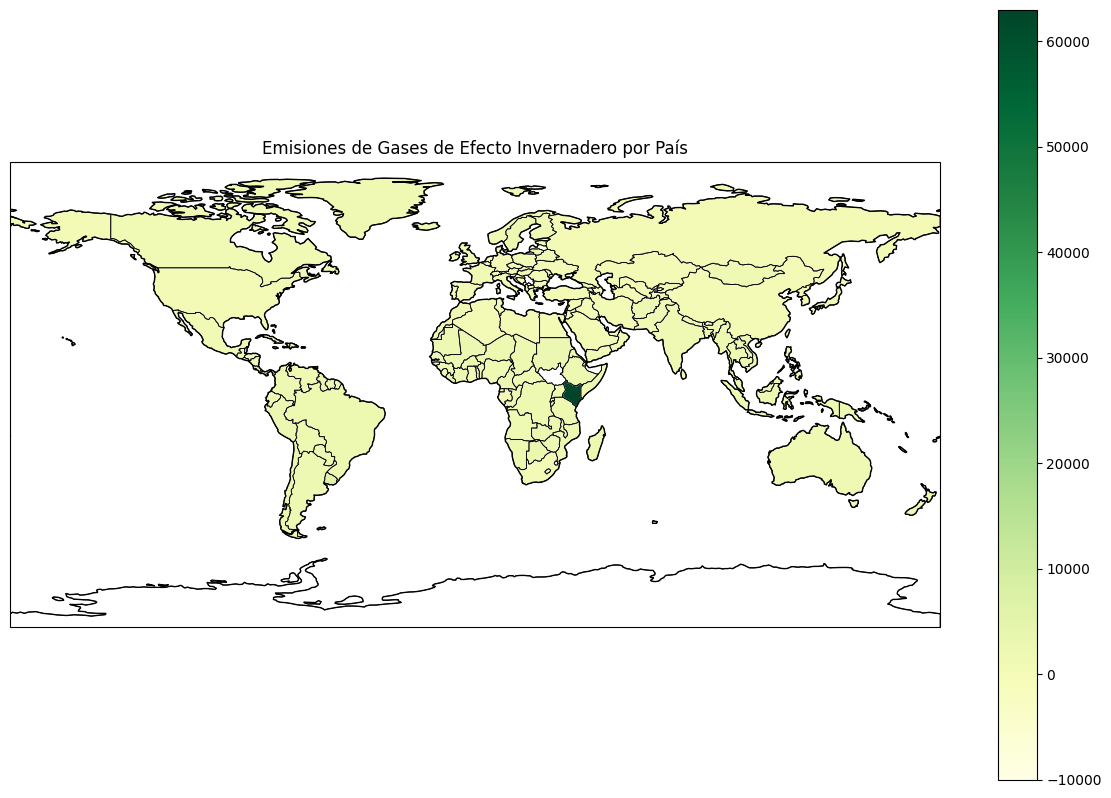

In [10]:
# Calcular las emisiones totales por entidad
total_emissions_per_entity = datos.groupby('Code')['Emissions'].sum().reset_index()

# Cargar el archivo de geometría del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fusionar los datos con el archivo de geometría del mundo
world = world.set_index('iso_a3').join(total_emissions_per_entity.set_index('Code'))

# Crear la figura y los ejes
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Visualizar los datos
world.boundary.plot(ax=ax, linewidth=0.5, color='k')
world.plot(column='Emissions', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Configuración del mapa
ax.set_title("Emisiones de Gases de Efecto Invernadero por País")
ax.coastlines(resolution='110m', linewidth=1)
ax.set_global()
plt.show()

In [13]:
path = get_path("naturalearth.land")
df = gpd.read_file(path)
